In [1]:
import numpy as np
from itertools import product,combinations
import matplotlib.pyplot as plt
from math import log
import scipy.stats

### major functions

In [2]:
def design_matrix(n):
    D=[]
    for i in product([-1,+1],repeat=n):
        D.append(list(i))
    return D

In [3]:
def effect_matrix(d):
    dm=np.flip(d,1)
    (r,c)=np.shape(dm)
    x=''
    for i in range(c):
        x+=str(i)
    labels=[]
    for i in range(c-1):
        for j in combinations(x,i+2):
            labels.append(list(map(int,j)))
    for i in range(len(labels)):
        I=np.full(r,1)
        for j in labels[i]:
            I=I*dm[:,j]
        dm=np.insert(dm,np.shape(dm)[1],I,1)
    return (dm,labels)

In [4]:
def effects(e,R):
    avg=np.mean(R,axis=0)
    e=e.astype('float64')
    for i in range(len(e)):
        for j in range(len(e[i])):
            e[i][j]=e[i][j]*avg[i]
    return e

In [5]:
def eff_det(E,labels,R):
    AVG=np.mean(R)
    e=[("AVG",AVG)]
    labels2=[]
    for i in labels[-1]:
        labels2.append([i])
    labels2.extend(labels)
    (r,c)=np.shape(E)
    for i in range(c):
        e.append((l2str(labels2[i]),np.sum(E[:,i])/(2**(len(labels[-1])-1))))
    if len(R)==2:
        N=2*len(R[0])
        s2=np.sum((R[0]-R[1])**2)/(2*len(R[0]))
        V_eff=(4/N)*s2
        sd_eff=np.sqrt(V_eff)
        V_ave=(s2/N)
        sd_ave=np.sqrt(V_ave)
    return (e,sd_eff,sd_ave)

In [6]:
def significants(eff_ints,sd_ave,sd_eff,a):
    t_crit=scipy.stats.t.ppf(q=1-a,df=len(eff_ints))
    sig=[]
    if eff_ints[0][1]/sd_ave>=t_crit:
        sig.append(eff_ints[0])
    for i in range(1,len(eff_ints)):
        if eff_ints[i][1]/sd_eff>=t_crit:
            sig.append(eff_ints[i])
    return sig

In [7]:
def seq_eval(sig,seq=''): #,extremes):
    if seq:
        val=sig[0][1]
        for i in range(len(seq)):
            if seq[i]=="+":
                val+=(sig[i+1][1]/2)*1 #extremes[i][1]
            elif seq[i]=="-":
                val+=(sig[i+1][1]/2)*(-1) #extremes[i][0]
    return val            

In [8]:
def model_eval(sig,seq_list): #,extremes):
    L=[]
    for seq in seq_list:
        L.append((seq,seq_eval(sig,seq)))
    return L  

In [9]:
#all main effects considered
def model(dm,eff_ints,order=1): #,extremes):
    n=log(len(dm),2)
    est=[]
    for i in range(len(dm)):
        val=eff_ints[0][1]
        for j in range(len(dm[i])):
            val+=((eff_ints[j+1][1])/2)*dm[i][j] #extremes[j][1/0]
        est.append(val)
    return (est)

In [10]:
def resi(A,R):
    avg=np.mean(R,axis=0)
    res=[]
    for i in range(len(avg)):
        res.append(avg[i]-A[i])
    return res

In [11]:
def prob_plot(A,label,title=''):
    m=len(A)
    Pi=[(100/m)*(i-0.5) for i in range(1,m+1)]
    A.sort()
    plt.scatter(A,Pi)
    plt.axvline(x=0, c="black")
    plt.axhline(y=0, c="black")
    plt.xlabel("Probability")
    plt.ylabel(label)
    plt.title(label+" Vs "+ "Probability"+title)

### minor functions

In [12]:
def l2str(A):
    x=''
    for i in A:
        x+=str(i)
    return x

In [13]:
def dm2strL(dm):
    L=[]
    for i in range(len(dm)):
        x=''
        for j in range(len(dm[i])):
            if dm[i][j]==1:
                x+='+'
            elif dm[i][j]==-1:
                x+='-'
        L.append(x)
    return (L)

### Model formation

In [14]:
R=np.array([[7.28,5.03,2.64,2.30,2.54,19.25,5.21,14.41],
            [4.54,4.07,4.02,2.04,1.53,13.35,4.31,14.35]])

n=3
A=design_matrix(n)
A=np.array(A)
E=effect_matrix(A)
E1=effects(E[0],R)
(eff_ints,sd_eff,sd_ave)=eff_det(E1,E[1],R)
eff_ints

[('AVG', 6.679375),
 ('0', 5.34125),
 ('1', -1.0387500000000003),
 ('2', 5.37875),
 ('01', -1.1112500000000005),
 ('02', 6.601249999999999),
 ('12', 1.4412500000000001),
 ('012', -1.2112500000000002)]

In [15]:
E #effect matrix

(array([[-1, -1, -1,  1,  1,  1, -1],
        [ 1, -1, -1, -1, -1,  1,  1],
        [-1,  1, -1, -1,  1, -1,  1],
        [ 1,  1, -1,  1, -1, -1, -1],
        [-1, -1,  1,  1, -1, -1,  1],
        [ 1, -1,  1, -1,  1, -1, -1],
        [-1,  1,  1, -1, -1,  1, -1],
        [ 1,  1,  1,  1,  1,  1,  1]]),
 [[0, 1], [0, 2], [1, 2], [0, 1, 2]])

In [16]:
sd_eff

0.8573660609681257

In [17]:
sd_ave

0.42868303048406287

In [18]:
a=0.05
sig=significants(eff_ints,sd_ave,sd_eff,a)
sig

[('AVG', 6.679375), ('0', 5.34125), ('2', 5.37875), ('02', 6.601249999999999)]

### Residuals

In [19]:
B=design_matrix(len(sig)-1)
seq_list=dm2strL(B)

In [20]:
L=model_eval(sig,seq_list)
L

[('---', -1.9812499999999988),
 ('--+', 4.620000000000001),
 ('-+-', 3.3975000000000013),
 ('-++', 9.998750000000001),
 ('+--', 3.36),
 ('+-+', 9.96125),
 ('++-', 8.73875),
 ('+++', 15.34)]

In [21]:
"""
residuals=resi(A,R) #fill manually
residuals

"""

'\nresiduals=resi(A,R) #fill manually\nresiduals\n\n'

In [22]:
"""
prob_plot(residuals,'Residuals')

"""

"\nprob_plot(residuals,'Residuals')\n\n"

In [23]:
#all main effects considered
M=model(A,eff_ints) #,extremes)
residuals=resi(M,R)
residuals

[4.071249999999999,
 -2.6675000000000004,
 2.5299999999999994,
 -4.008750000000001,
 -5.145,
 3.741250000000001,
 -1.3812499999999996,
 2.8599999999999994]

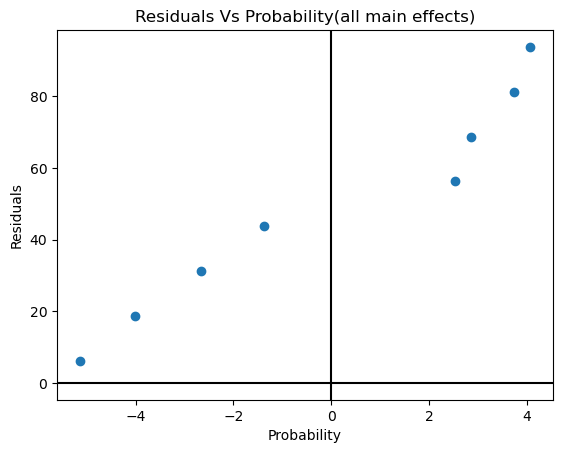

In [24]:
prob_plot(residuals,'Residuals',title="(all main effects)")